## Project: Store Sales Analysis

Hemant Thapa

#### 1. Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### 2. Loading Dataset 

In [2]:
df = pd.read_csv('store.csv')
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,$54.00
1,MyStore,1,3,2,1,10,Cash,7,-$17.80
2,MyStore,1,3,2,1,10,Card,7,$41.99
3,MyStore,1,3,2,1,11,Card,20,$412.50
4,MyStore,1,3,2,1,12,Cash,1,-$18.00


In [3]:
df.tail()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
4095,MyStore,53,1,31,12,13,Card,10,$129.00
4096,MyStore,53,1,31,12,14,Cash,32,-$68.36
4097,MyStore,53,1,31,12,14,Card,5,$71.00
4098,MyStore,53,1,31,12,15,Cash,66,-$359.18
4099,MyStore,53,1,31,12,15,Card,4,$130.00


#### 3. Pre Processing 

##### 3.1 Missing Completely at Random

Imagine you hand out a survey, and some people forget to fill in the "Age" question just because they didn’t see it. This could happen to anyone, and it’s not related to their age or any other factor in the survey.

Why it’s MCAR: The missing "Age" data has no pattern and isn't influenced by the age of the person or any other information.

You can safely ignore or remove the missing data, knowing it won’t affect your results because the missingness is random.

##### 3.2 Missing at Random (MAR)

In a job satisfaction survey, higher-paid employees tend to skip the "Salary" question. However, their job title and satisfaction scores are still available, which gives clues about why the salary is missing.

Why it’s MAR: The missing salary is linked to other variables like job title or job satisfaction, but it’s not directly related to how much money the person makes.

You can use those other variables (job title, satisfaction scores) to estimate or predict the missing salary values. Just deleting the data might lead to biased results, so using imputation or modeling is better.


##### 3. Missing Not at Random (MNAR)

In a survey about alcohol consumption, people who drink a lot may leave the "How many drinks per week?" question blank because they don’t want to reveal the truth.

Why it’s MNAR: The missing data is caused by the fact that the people who drink more are more likely to hide their answers, so it’s directly linked to the value (their drinking habits).

This is the hardest type of missing data to deal with. You might need advanced techniques or even external data to try and understand the missing values, or you could conduct follow-ups to get more information.

In [4]:
# Rows and Columns
df.shape

(4100, 9)

In [5]:
# information of each columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BranchName        4100 non-null   object
 1   Week              4100 non-null   int64 
 2   DayWeek           4100 non-null   int64 
 3   Day               4100 non-null   int64 
 4   Month             4100 non-null   int64 
 5   Hour              4100 non-null   int64 
 6   Transaction_Type  4100 non-null   object
 7   Units             4100 non-null   int64 
 8   Amount            4100 non-null   object
dtypes: int64(6), object(3)
memory usage: 288.4+ KB


In [6]:
# checking missing values
df.isnull().sum()

BranchName          0
Week                0
DayWeek             0
Day                 0
Month               0
Hour                0
Transaction_Type    0
Units               0
Amount              0
dtype: int64

In [7]:
# converting amount columns into numerical value
df['Amount'] = df['Amount'].str.replace('$', '')
df['Amount'] = df['Amount'].str.replace(' ', '')
df['Amount'] = df['Amount'].str.replace(',', '')
df['Amount'] = df['Amount'].astype(float)
df['Amount'].dtype
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


In [8]:
# count the number of duplicate rows
df.duplicated().sum()

0

In [9]:
# summary of statical analysis
df.describe()

,Week,DayWeek,Day,Month,Hour,Units,Amount
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,34.017805,4.183902,15.812195,8.231463,12.949024,12.779512,35.237046
std,14.714289,1.967864,8.810817,3.396586,2.631853,17.854968,183.538724
min,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,-1041.800000
25%,29.000000,3.000000,8.000000,7.000000,11.000000,3.000000,-47.000000
50%,37.000000,4.000000,16.000000,9.000000,13.000000,8.000000,-2.385000
75%,45.000000,6.000000,23.000000,11.000000,15.000000,16.000000,99.512500
max,53.000000,7.000000,31.000000,12.000000,19.000000,274.000000,1487.000000


In [10]:
# statistics of categorical columns
df.describe(include='object')

,BranchName,Transaction_Type
count,4100,4100
unique,1,2
top,MyStore,Card
freq,4100,2811


In [11]:
# count unqiue value in each columns
df.nunique()

BranchName             1
Week                  33
DayWeek                7
Day                   31
Month                  7
Hour                  12
Transaction_Type       2
Units                113
Amount              2353
dtype: int64

#### 4. Exploratory Data Analysis

##### 4.1 Histogram plot 

In [12]:
def HistPlot(df, col, title): 
    # plotting histoplot
    df[col].plot(kind='hist', bins=20, alpha=0.6, color='blue')
    # calcualting mean and meddian
    mean_value = df[col].mean()
    meadian_value = df[col].median()
    # title of plot
    plt.title(title)
    # title of axis
    plt.xlabel(col)
    plt.ylabel('Number of Count')
    # mean and meadian line with text
    plt.axvline(mean_value, color='black', linestyle='dashed', linewidth=2)
    plt.text(mean_value, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', color='black')
    plt.axvline(meadian_value, color='red', linestyle='dashed', linewidth=2)
    plt.text(meadian_value, plt.gca().get_ylim()[1] * 0.7, f'Meadian: {meadian_value:.2f}', color='red')
    # grid line
    plt.grid(True, ls='--', alpha=0.3, color='grey')
    # label of data
    plt.legend()
    plt.show()

In [13]:
df[:5]

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


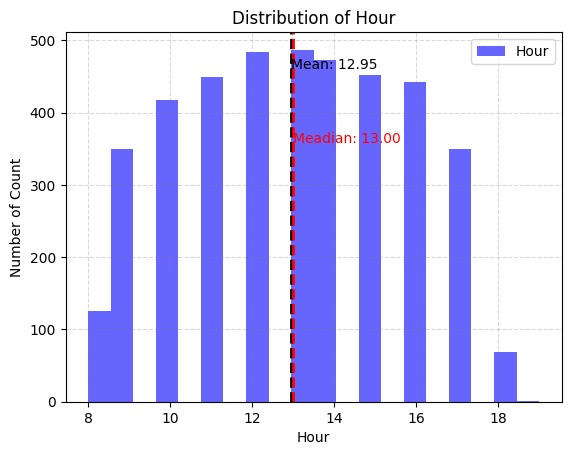

In [14]:
HistPlot(df, 'Hour', 'Distribution of Hour')

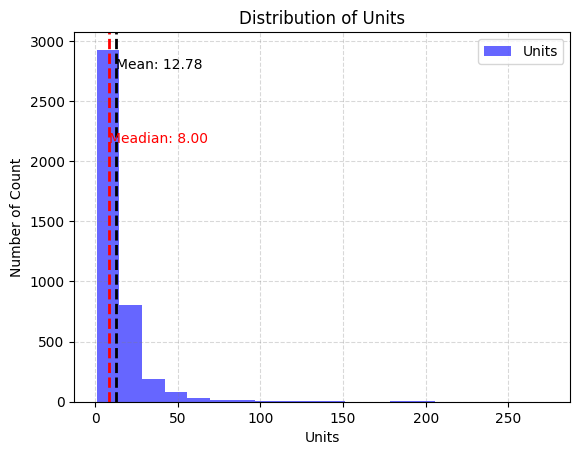

In [15]:
HistPlot(df, 'Units', 'Distribution of Units')

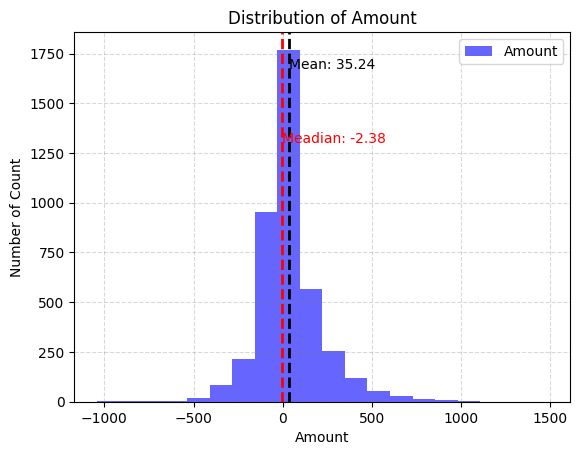

In [16]:
HistPlot(df, 'Amount', 'Distribution of Amount')

##### 4.1 Line plot 

In [17]:
df[:5]

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


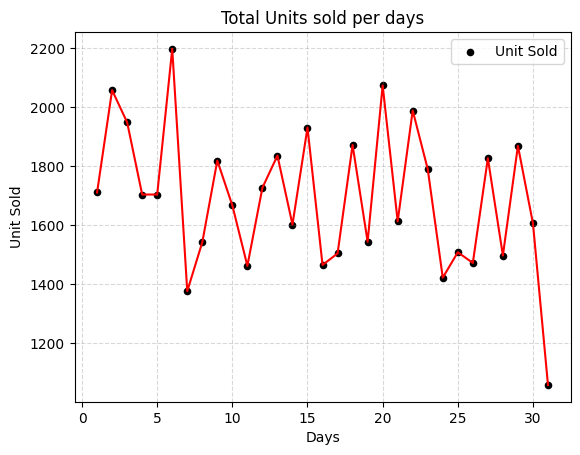

In [18]:
day_units_sum = df.groupby('Day')['Units'].sum().reset_index()
plt.plot(day_units_sum['Day'], day_units_sum['Units'], color='red')
plt.scatter(day_units_sum['Day'], day_units_sum['Units'], color='black', s=20, label='Unit Sold')
plt.title('Total Units sold per days')
plt.xlabel('Days')
plt.ylabel('Unit Sold')
# grid line
plt.grid(True, ls='--', alpha=0.3, color='grey')
# label of data
plt.legend()
plt.show()

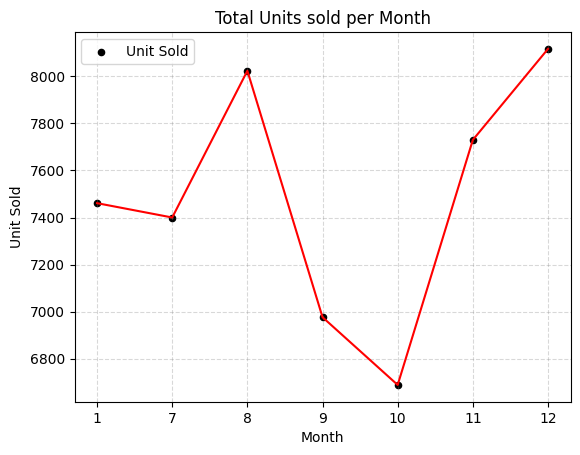

In [19]:
month_units_sum = df.groupby('Month')['Units'].sum().reset_index()
month_units_sum['Month'] = month_units_sum['Month'].astype(str)
plt.plot(month_units_sum['Month'], month_units_sum['Units'], color='red')
plt.scatter(month_units_sum['Month'], month_units_sum['Units'], color='black', s=20, label='Unit Sold')
plt.title('Total Units sold per Month')
plt.xlabel('Month')
plt.ylabel('Unit Sold')
# grid line
plt.grid(True, ls='--', alpha=0.3, color='grey')
# label of data
plt.legend()
plt.show()

##### 4.2 Bar Plot

In [20]:
df[:5]

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


In [21]:
df['Transaction_Type'].value_counts()

Transaction_Type
Card    2811
Cash    1289
Name: count, dtype: int64

In [22]:
df['Transaction_Type'].value_counts()[0], df['Transaction_Type'].value_counts()[1]

(2811, 1289)

In [23]:
f'Card payment customer are {(df['Transaction_Type'].value_counts()[0] - df['Transaction_Type'].value_counts()[1]) /df['Transaction_Type'].value_counts()[1]  * 100:.2f} % more than cash payment customer'

'Card payment customer are 118.08 % more than cash payment customer'

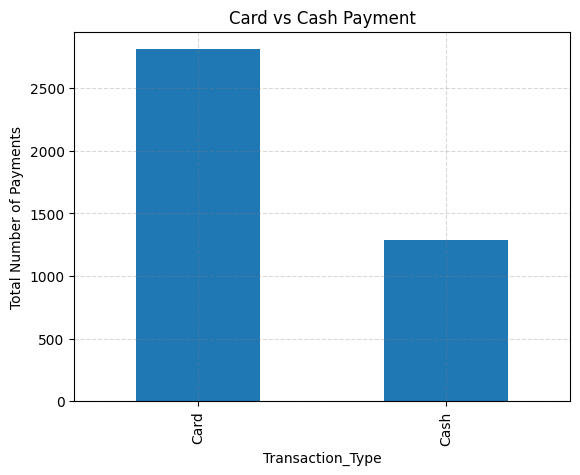

In [24]:
df['Transaction_Type'].value_counts().plot(kind='bar')
plt.grid(True, ls='--', alpha=0.3, color='grey')
plt.ylabel('Total Number of Payments')
plt.title('Card vs Cash Payment')
plt.show()

In [25]:
month_sums = df.groupby('Month')['Amount'].sum().reset_index()
month_sums['Month'] = month_sums['Month'].astype(str)

In [26]:
month_sums

,Month,Amount
0,1,14063.03
1,7,17780.97
2,8,14788.34
3,9,17880.65
4,10,17873.42
5,11,19347.99
6,12,42737.49


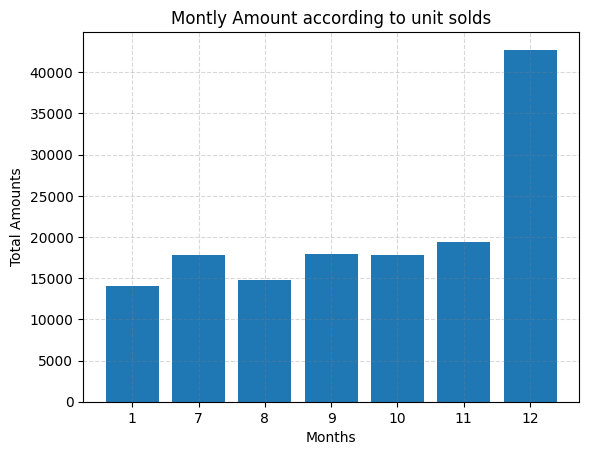

In [27]:
plt.bar(month_sums['Month'], month_sums['Amount'], label='Total Amount')
plt.grid(True, ls='--', alpha=0.3, color='grey')
plt.ylabel('Total Amounts')
plt.xlabel('Months')
plt.title('Montly Amount according to unit solds')
plt.show()

In [28]:
df[:5]

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


In [29]:
weekly_sums = df.groupby('Week')['Amount'].sum().reset_index()
weekly_sums['Week'] = weekly_sums['Week'].astype(str)

In [30]:
weekly_sums

,Week,Amount
0,1,5715.57
1,2,1032.93
2,3,1185.30
3,4,3422.98
4,5,2706.25
5,26,851.46
6,27,1895.53
7,28,4971.70
8,29,4739.10
9,30,5628.75


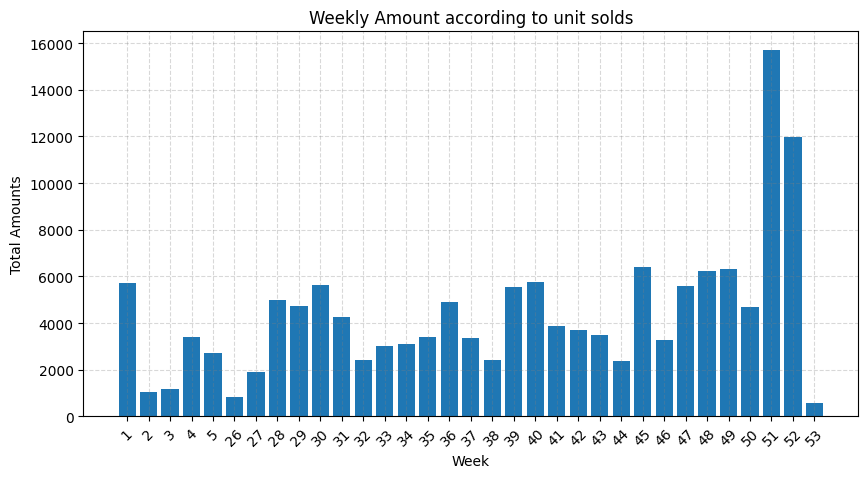

In [31]:
plt.figure(figsize=(10,5))
plt.bar(weekly_sums['Week'], weekly_sums['Amount'], label='Total Amount')
plt.grid(True, ls='--', alpha=0.3, color='grey')
plt.ylabel('Total Amounts')
plt.xlabel('Week')
plt.title('Weekly Amount according to unit solds')
plt.xticks(rotation=45)
plt.show()

#### 5. Machine Learning

In [32]:
df[:5]

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [34]:
# target
df['Transaction_Type'] = df['Transaction_Type'].replace({'Card':0, 'Cash':1})

In [35]:
df[:5]

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,0,3,54.00
1,MyStore,1,3,2,1,10,1,7,-17.80
2,MyStore,1,3,2,1,10,0,7,41.99
3,MyStore,1,3,2,1,11,0,20,412.50
4,MyStore,1,3,2,1,12,1,1,-18.00


In [36]:
df['Transaction_Type'].value_counts()

Transaction_Type
0    2811
1    1289
Name: count, dtype: int64

##### Feature Selection 

In [37]:
# Features 
X = df[['Units', 'Amount']]

# Target 
y = df['Transaction_Type']

##### Feature Scaling 

In [38]:
X = (X - X.mean())/X.std()

In [39]:
X[:5]

,Units,Amount
0,-0.547719,0.102229
1,-0.323692,-0.288969
2,-0.323692,0.036793
3,0.404397,2.055495
4,-0.659733,-0.290059


##### Split Data into Train and Test 

In [40]:
# 80 percent of data will be train and 20 percent will be used for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# creating model
rf_Classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_Classifier

RandomForestClassifier(random_state=42)

In [42]:
# Fitting Model
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = rf_Classifier.predict(X_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

##### Model Evaluation 

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[487,  79],
       [ 97, 157]], dtype=int64)

In [47]:
true_positive = confusion_matrix[1, 1]
true_negative = confusion_matrix[0, 0]
false_positive = confusion_matrix[0, 1]
false_neagtive = confusion_matrix[1, 0]

print(f'True Positive : {true_positive}')
print(f'True Negative : {true_negative}')
print(f'False Positive : {false_positive}')
print(f'Flase Negative : {false_neagtive}')

True Positive : 157
True Negative : 487
False Positive : 79
Flase Negative : 97


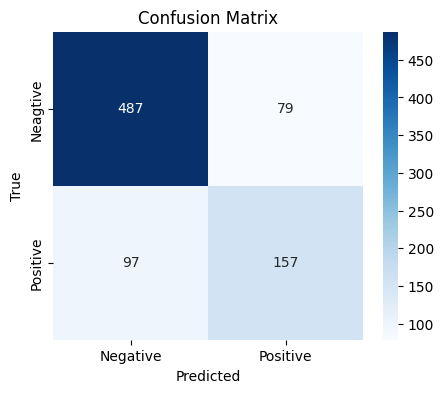

In [52]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Neagtive', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Accuracy 

In [58]:
print(f'Accuracy of Model is {accuracy_score(y_test, y_pred):.4f}')

Accuracy of Model is 0.7854


In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

##### Precision 

In [60]:
print(f'Precision of Model is {precision_score(y_test, y_pred):.4f}')

Precision of Model is 0.6653


##### Recall 

In [61]:
print(f'Recall of Model is {recall_score(y_test, y_pred):.4f}')

Recall of Model is 0.6181


##### F1 Score 

In [62]:
print(f'F1 Score of Model is {f1_score(y_test, y_pred):.4f}')

F1 Score of Model is 0.6408


##### ROC (Receiver Operating Characteristic)

In [63]:
from sklearn.metrics import roc_curve, auc

In [64]:
y_test_scores = rf_Classifier.predict_proba(X_test)[:,1]

In [66]:
y_test_scores[:5]

array([0.    , 0.    , 0.28  , 0.9675, 0.    ])

In [67]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_scores)
roc_auc_test = auc(fpr_test, tpr_test)

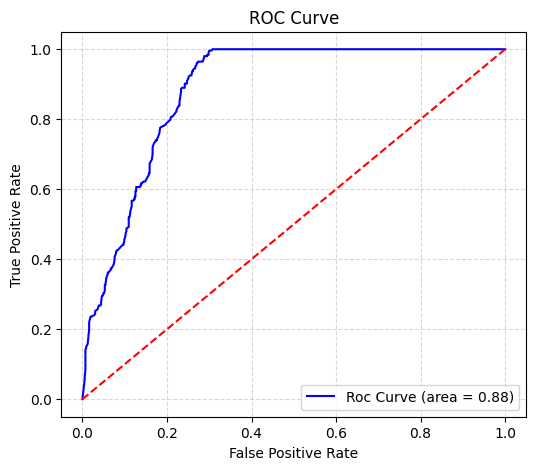

In [76]:
plt.figure(figsize=(6,5))
plt.plot(fpr_test, tpr_test, color='blue', label='Roc Curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.grid(True, ls='--', alpha=0.3, color='grey')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#### Decision Boundary 

In [77]:
X[:5]

,Units,Amount
0,-0.547719,0.102229
1,-0.323692,-0.288969
2,-0.323692,0.036793
3,0.404397,2.055495
4,-0.659733,-0.290059


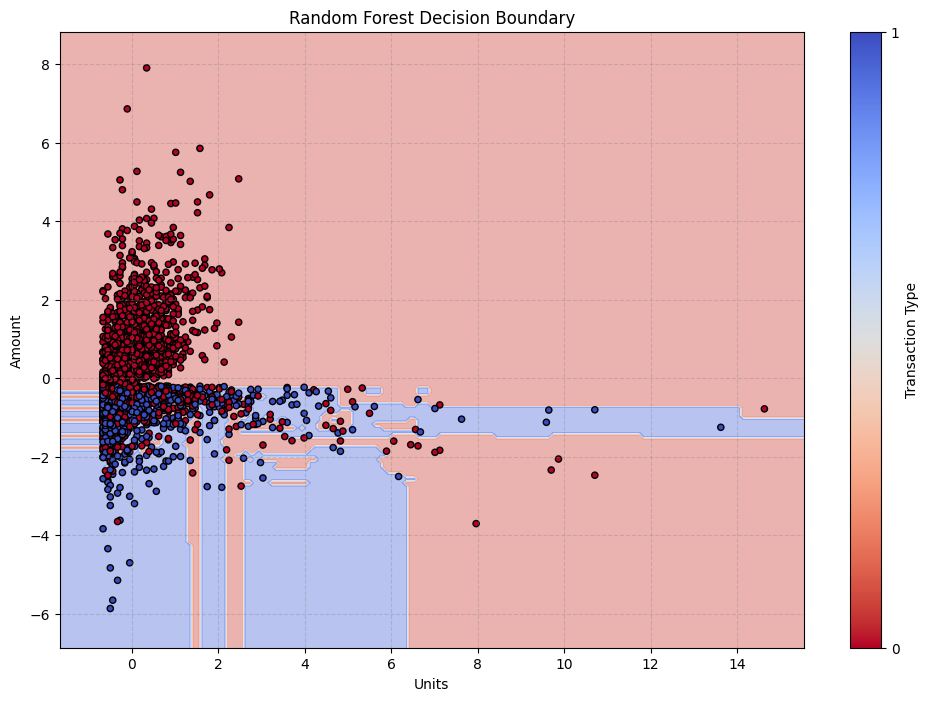

In [85]:
# mesh grid 
x_min, x_max = X['Units'].min() - 1, X['Units'].max() + 1
y_min, y_max = X['Amount'].min() - 1, X['Amount'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# predict on the grid
z = rf_Classifier.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, z, alpha=0.4, cmap=plt.cm.coolwarm_r)
plt.scatter(X['Units'], X['Amount'], c=y, edgecolors='k', s=20, cmap=plt.cm.coolwarm_r)
plt.xlabel('Units')
plt.ylabel('Amount')
plt.title('Random Forest Decision Boundary')
plt.colorbar(ticks=[0, 1], label='Transaction Type')
plt.grid(True, ls='--', alpha=0.3, color='grey')
plt.show()